# Notes - maternal age


In [ ]:
import duckdb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from sympy.physics.units import magnetic_density

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

os.makedirs("./outputs", exist_ok=True)

In [2]:
con = duckdb.connect("./data/us_births.db", read_only=True)

## Preparation

We use the first value from `MAGER`, `DMAGE` or `(MAGER41 + 13)` to produce `MAGE_C`, giving maternal age from 10 to 54 years.

In [3]:
year_summary_df = con.execute(
    """
    SELECT
        year, COUNT (*) AS all, COUNT(mage_c) as mage_c, COUNT(umagerpt) as umagerpt, COUNT(mager) as mager, COUNT(dmage) as dmage, COUNT(dmagerpt) as dmagerpt, COUNT (mage_impflg) as mage_impflg, COUNT(mage_repflg) as mage_repflg, COUNT(mager41) as mager41, COUNT(mager9) as mager9
    FROM
        us_births
    WHERE
        year >= 1989
    GROUP BY year
    ORDER BY year
    """
).df()
year_summary_df

,year,all,mage_c,umagerpt,mager,dmage,dmagerpt,mage_impflg,mage_repflg,mager41,mager9
0,1989,4045693,4045693,0,0,4045693,4045693,0,0,0,0
1,1990,4162917,4162917,0,0,4162917,4162917,0,0,0,0
2,1991,4115342,4115342,0,0,4115342,4115342,0,0,0,0
3,1992,4069428,4069428,0,0,4069428,4069428,0,0,0,0
4,1993,4004523,4004523,0,0,4004523,4004523,0,0,0,0
5,1994,3956925,3956925,0,0,3956925,3956925,0,0,0,0
6,1995,3903012,3903012,0,0,3903012,3903012,0,0,0,0
7,1996,3894874,3894874,0,0,3894874,3894874,0,0,0,0
8,1997,3884329,3884329,0,0,3884329,3884329,0,0,0,0
9,1998,3945192,3945192,0,0,3945192,3945192,0,0,0,0


In [4]:
mage_df = con.execute(
    """
    SELECT
        mage_c, AVG(down_ind) as p_down_ind, COUNT(*) as lb, SUM(down_ind) as down_ind
    FROM
        us_births
    WHERE
        year >= 1989
      AND restatus <> 4
    GROUP BY mage_c
    ORDER BY mage_c
    """
).df()
mage_df.set_index("mage_c")
mage_df

,mage_c,p_down_ind,lb,down_ind
0,10,0.000000,134,0.0
1,11,0.000000,428,0.0
2,12,0.000421,5602,2.0
3,13,0.000222,36797,7.0
4,14,0.000253,186224,39.0
5,15,0.000330,597104,163.0
6,16,0.000332,1332342,364.0
7,17,0.000318,2336164,609.0
8,18,0.000316,3649786,945.0
9,19,0.000330,5127400,1388.0


Text(0, 0.5, 'DS recorded count')

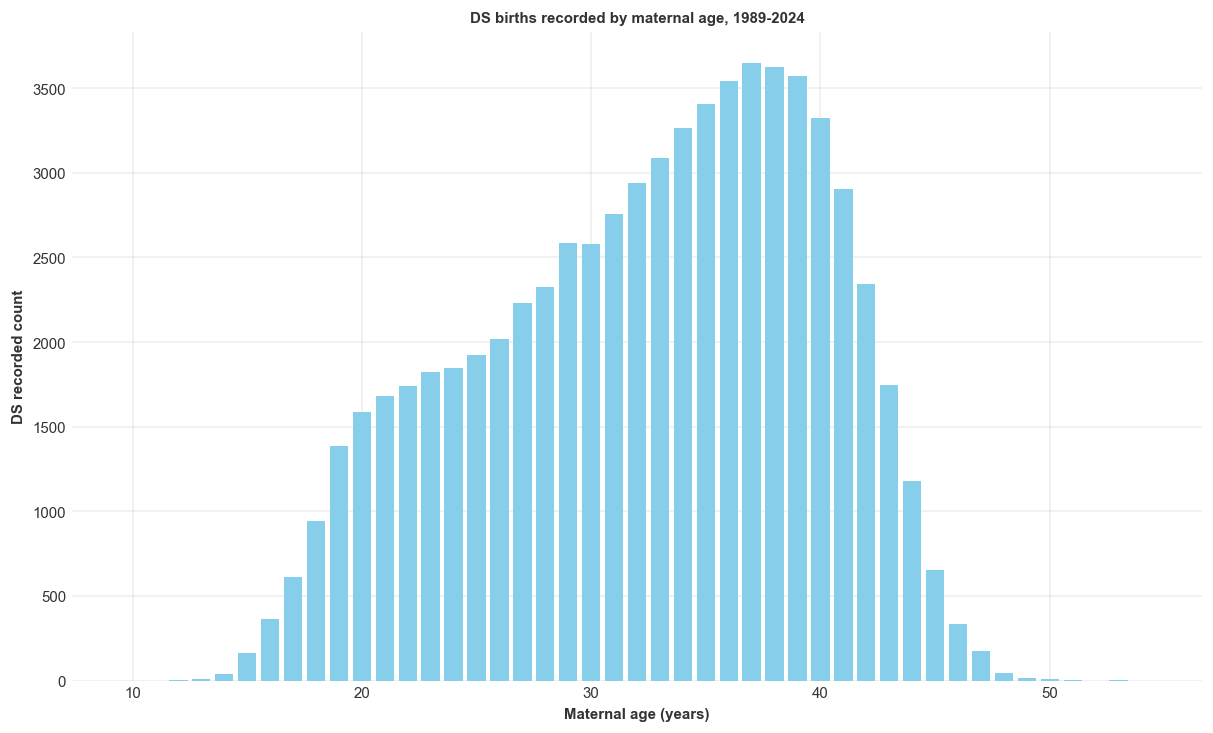

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(mage_df["mage_c"], mage_df["down_ind"], color='skyblue')
plt.title('DS births recorded by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('DS recorded count')

Text(0, 0.5, 'Count')

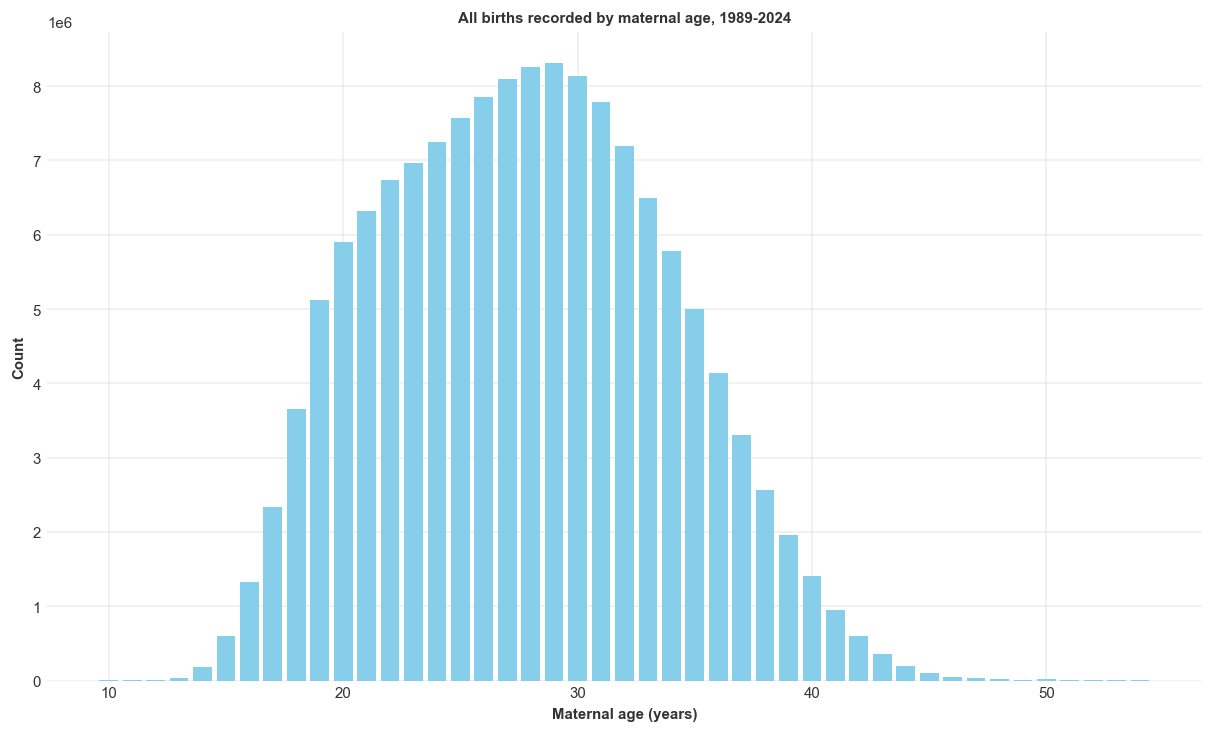

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(mage_df["mage_c"], mage_df["lb"], color='skyblue')
plt.title('All births recorded by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('Count')

Text(0, 0.5, 'Probability DS birth recorded')

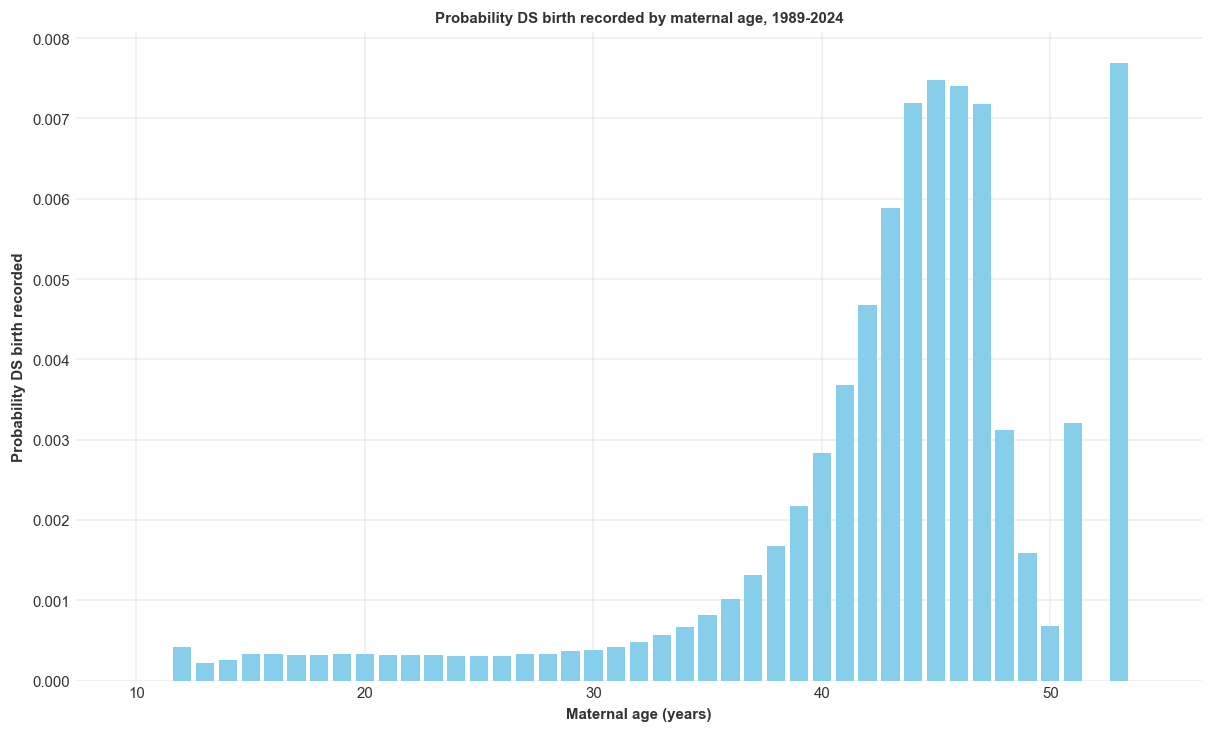

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(mage_df["mage_c"], mage_df["p_down_ind"], color='skyblue')
plt.title('Probability DS birth recorded by maternal age, 1989-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('Probability DS birth recorded')


In [8]:
mage_from2004_df = con.execute(
    """
    SELECT
        mage_c,
        AVG(down_ind) as p_down_ind,
        AVG(p_ds_lb_nt) as p_ds_lb_nt,
        AVG(p_ds_lb_wt) as p_ds_lb_wt,
        COUNT(*) as lb,
        SUM(down_ind) as down_ind
    FROM
        us_births
    WHERE
        year >= 2004
      AND restatus <> 4
    GROUP BY mage_c
    ORDER BY mage_c
    """
).df()
mage_from2004_df.set_index("mage_c")
mage_from2004_df

,mage_c,p_down_ind,p_ds_lb_nt,p_ds_lb_wt,lb,down_ind
0,12,0.000000,0.000657,0.001273,2001,0.0
1,13,0.000125,0.000658,0.001269,11683,1.0
2,14,0.000213,0.000659,0.001269,60366,9.0
3,15,0.000476,0.000660,0.001268,211555,71.0
4,16,0.000371,0.000662,0.001269,506943,134.0
5,17,0.000395,0.000664,0.001270,950412,270.0
6,18,0.000357,0.000667,0.001272,1626623,426.0
7,19,0.000354,0.000672,0.001275,2496739,665.0
8,20,0.000355,0.000677,0.001277,3015219,820.0
9,21,0.000348,0.000684,0.001279,3311559,892.0


Text(0, 0.5, 'DS recorded count')

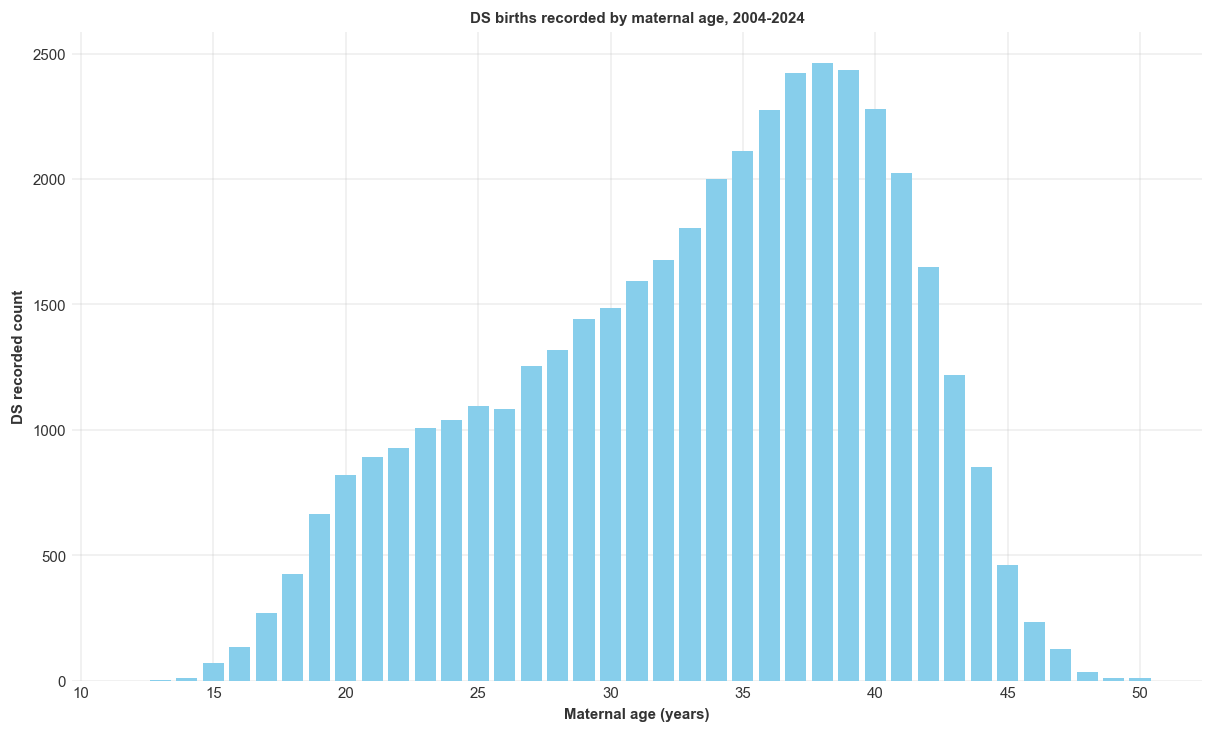

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(mage_from2004_df["mage_c"], mage_from2004_df["down_ind"], color='skyblue')
plt.title('DS births recorded by maternal age, 2004-2024')
plt.xlabel('Maternal age (years)')
plt.ylabel('DS recorded count')

In [10]:
import chance
import numpy as np
ages = np.arange(10,55)
ds_lb_nt = chance.get_ds_lb_nt_probability_array(ages)


Text(0.5, 1.0, 'Probability DS birth recorded by maternal age, 2004-2024')

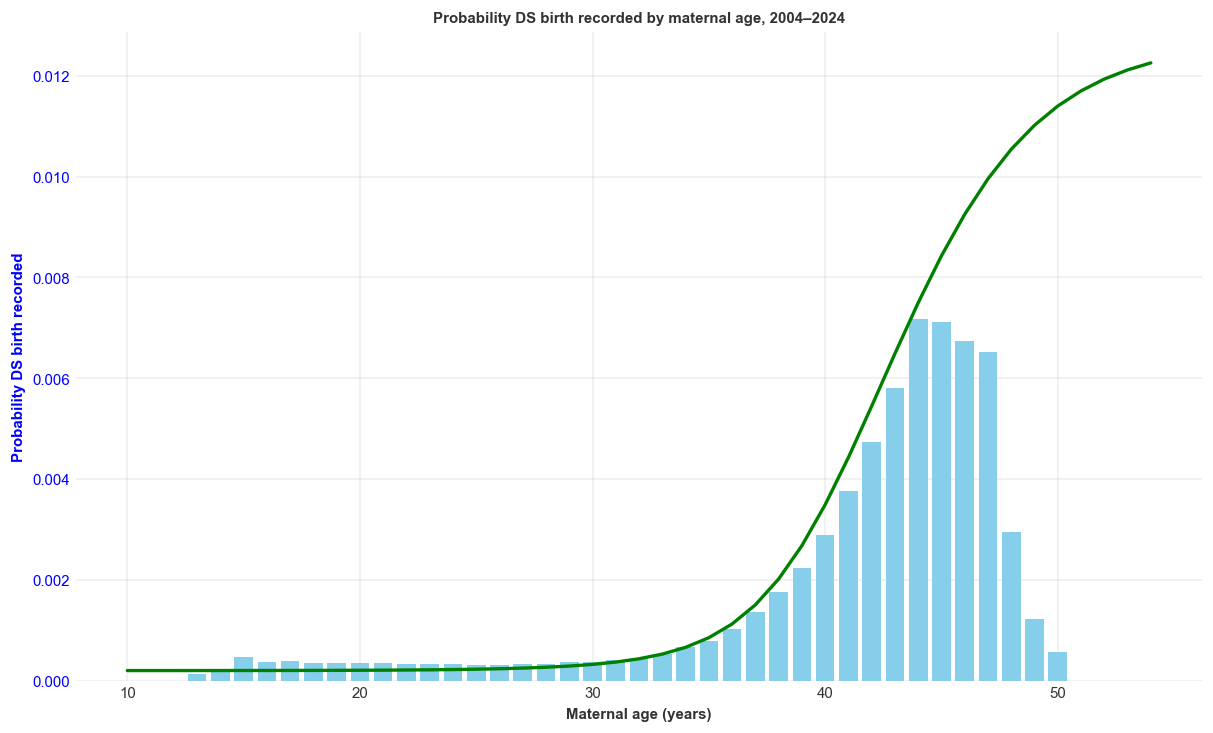

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(mage_from2004_df["mage_c"], mage_from2004_df["p_down_ind"], color='skyblue')
ax1.set_xlabel('Maternal age (years)')
ax1.set_ylabel('Probability DS birth recorded', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.plot(ages, ds_lb_nt * 0.3, color='green', linewidth=2)

# --- Title and layout ---
plt.title('Probability DS birth recorded by maternal age, 2004-2024')
